In [ ]:
pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('labeled_data.csv')

In [3]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

## Cleaning

In [5]:
df=df[['class','tweet']]

In [6]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
class    24783 non-null int64
tweet    24783 non-null object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [8]:
df.rename(columns={'class':'target','tweet':'text'},inplace=True)

In [9]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
#duplicates
df.duplicated().sum()

0

In [11]:
df.shape

(24783, 2)

## EDA

In [12]:
df.head()

,target,text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [13]:
df['target'].value_counts()

1    19190
2     4163
0     1430
Name: target, dtype: int64

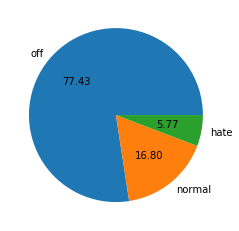

In [14]:
plt.pie(df['target'].value_counts(),labels=['off','normal','hate'],autopct='%0.2f')
plt.show()

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_char']=df['text'].apply(len)

In [18]:
df['num_words']=df['text'].apply(lambda x :len(nltk.word_tokenize(x)))

In [19]:
df['num_sent']=df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,target,text,num_char,num_words,num_sent
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,34,3
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,26,3
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,35,4
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,20,2
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,43,2


In [21]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,24783.000000,24783.000000,24783.000000
mean,85.436065,19.913126,1.392648
std,41.548238,11.829687,0.774204
min,5.000000,1.000000,1.000000
25%,52.000000,11.000000,1.000000
50%,81.000000,18.000000,1.000000
75%,119.000000,27.000000,2.000000
max,754.000000,321.000000,42.000000


In [22]:
sns.heatmap(df.corr(),annot=True)

NameError: name 'sns' is not defined

### Preprocessing

In [27]:
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [33]:
from nltk.corpus import stopwords

In [34]:
def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [35]:
transform(df['text'][0])

'rt mayasolov woman complain clean hous amp man alway take trash'

In [36]:
df['transformed_txt']=df['text'].apply(transform)

In [54]:
df['target']=df['target'].apply(lambda x : 0 if x==1 else x)

In [56]:
df['target']=df['target'].apply(lambda x : 1 if x==2 else x)

In [57]:
df.head()

,target,text,num_char,num_words,num_sent,transformed_txt
0,1,!!! RT @mayasolovely: As a woman you shouldn't...,140,34,3,rt mayasolov woman complain clean hous amp man...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,26,3,rt mleew17 boy dat cold tyga dwn bad cuffin da...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,35,4,rt urkindofbrand dawg rt 80sbaby4lif ever fuck...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,20,2,rt look like tranni
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,43,2,rt shenikarobert shit hear might true might fa...


In [58]:
df.target.value_counts()

0    20620
1     4163
Name: target, dtype: int64

### Model building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [60]:
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [106]:
X=cv.fit_transform(df['transformed_txt']).toarray()

In [98]:
X.shape

(24783, 24817)

In [63]:
y=df['target'].values

In [64]:
y

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [65]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [73]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [89]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [90]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='macro'))

0.6023804720597136
[[2426 1677]
 [ 294  560]]
0.57112351757869


In [108]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)

In [109]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='micro'))

0.9245511398022997
[[3997  106]
 [ 268  586]]
0.9245511398022997


In [85]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

In [86]:
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='micro'))

0.8997377446035909
[[4055   48]
 [ 449  405]]
0.8997377446035909


In [112]:
import pickle

In [113]:
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))